In [2]:
#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [4]:
#Acquire data
train_df = pd.read_csv('C:/Users/StephyJosin/Desktop/kaggle/train.csv')
test_df = pd.read_csv('C:/Users/StephyJosin/Desktop/kaggle/test.csv')

#preview dataset
train_df.head()
train_df.tail()

# Make a backup copy
train_copy = train_df.copy()
test_copy = test_df.copy()

In [5]:
#Analyze by describing data

#Which features are available in the dataset?
print(train_df.columns.values)

#Dimension of dataset
train_df.shape
test_df.shape

# train dataset-(891,12)
# test dataset-(418,11)

#Categorical features:
 #Categorical: Survived, Sex and Embarked. Ordinal: Pclass.
#Numerical features:
 #Continous: Age, Fare. Discrete: SibSp, Parch. 
#Mixed data type features:
 #Ticket,Cabin
#Features with errors or typos:
 #Name column may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.
#Features with missing values:
 #cabin,age and embarked columns in training dataset
 #cabin,age in test dataset

#View the datatypes:
train_df.info()
print('-'*40)
test_df.info()
#Seven features are integer or floats. Six in case of test dataset(minus survived column)
#Five features are strings (object).




['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-n

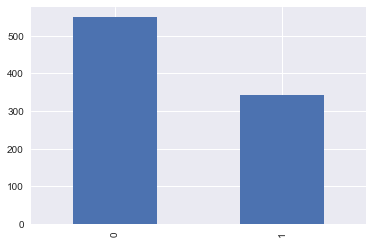

In [6]:
#Univariate Analysis


#First analyse the target variable i.e Survived 

#As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.
#Frequency table of a variable will give us the count of each category in that variable.
train_df['Survived'].value_counts()
#Survived count=549 and Dead count=342

#Normalize can be set to True to print proportions instead of number 
train_df['Survived'].value_counts(normalize=True)
#Survived rate=62% and Dead rate=38%

#Visualise distribution of target variable :
train_df['Survived'].value_counts().plot.bar()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


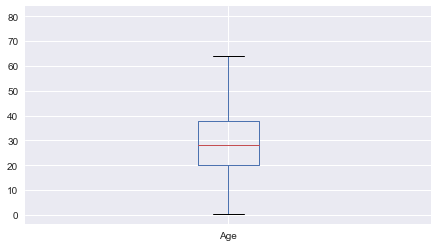

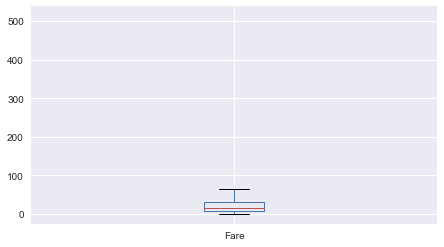

In [7]:
#Univariate Analysis
#Analyse the distribution of numeric independent variables
plt.figure()
plt.subplot(121)
train_df['Age'].plot.box(figsize=(16,4))
train_df.describe()

plt.figure()
plt.subplot(121)
train_df['Fare'].plot.box(figsize=(16,4))
train_df.describe()

#Observations:
#Survived is a categorical feature with 0 or 1 values.
#Most passengers (> 75%) did not travel with parents or children.
#Nearly 30% of the passengers had siblings and/or spouse aboard.
#Fares varied significantly with few passengers (<1%) paying as high as $512.
#Few elderly passengers (<1%) within age range 65-80.


In [8]:
#Analyse the distribution of categorical independent variables
train_df.describe(include=['O'])

#Names are unique across the dataset (count=unique=891)
#Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
#Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
#Embarked takes three possible values. S port used by most passengers (top=S)
#Ticket feature has high ratio (22%) of duplicate values (unique=681).

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kalvik, Mr. Johannes Halvorsen",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
# Assumptions based on data analysis
# We arrive at following assumptions based on data analysis done so far. 
#We may validate these assumptions further before taking appropriate actions.

# Correlating:

# We want to know how well does each feature correlate with Survival. 
#We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

# Completing:

# We may want to complete Age feature as it is definitely correlated to survival.
# We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

# Correcting:

# Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
# Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
# PassengerId may be dropped from training dataset as it does not contribute to survival.
# Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

# Creating:

# We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
# We may want to engineer the Name feature to extract Title as a new feature.
# We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
# We may also want to create a Fare range feature if it helps our analysis.

# Classifying:

# We may also add to our assumptions based on the problem description noted earlier.

# Women (Sex=female) were more likely to have survived.
# Children (Age<?) were more likely to have survived.
# The upper-class passengers (Pclass=1) were more likely to have survived.

In [10]:
#Analyze by pivoting features:

#Analyse feature correlations with the survived column based on our assumptions(Classifying step) .
#We can only do so at this stage for features which do not have any empty values.
#only for features which are categorical

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
#Analyze by pivoting features:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
#Analyze by pivoting features:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
#Analyze by pivoting features:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [14]:
#Analyze by pivoting features:Observations:

# Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3).
# We decide to include this feature in our model.
# Sex : Sex=female had very high survival rate at 74% (classifying #1).
# SibSp and Parch These features have zero correlation for certain values. (eg:when Parch =0 and SibSp=0)
# It may be best to derive a feature or a set of features from these individual features (creating #1).

C:\Users\StephyJosin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


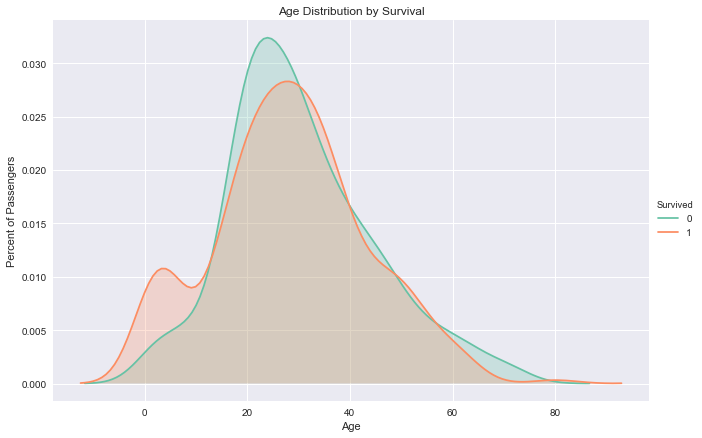

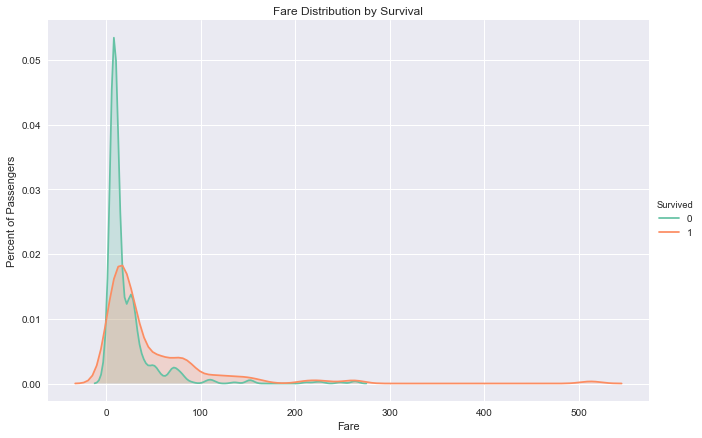

In [15]:
#Analyze by visualizing data:
#To confirm some of our assumptions using visualizations for analyzing the data.

#Correlating numerical features:
#A histogram chart is useful for analyzing continous numerical variables like Age,Fare where banding or ranges will 
#identify useful patterns. 

g=sns.FacetGrid(train_df, hue="Survived", aspect=1.5, size=6, palette="Set2")
g.map(sns.kdeplot, 'Age', shade=True)
g.set(ylabel='Percent of Passengers')
g.add_legend()
plt.title('Age Distribution by Survival');

g=sns.FacetGrid(train_df, hue="Survived", aspect=1.5, size=6, palette="Set2")
g.map(sns.kdeplot, 'Fare', shade=True)
g.set(ylabel='Percent of Passengers')
g.add_legend()
plt.title('Fare Distribution by Survival');    
#Observations:

# Infants (Age <=4) had high survival rate.
# Oldest passengers (Age = 80) survived.
# Large number of 15-25 year olds did not survive.
# Most passengers are in 15-35 age range.

#Decisions:
# We should consider Age in our model training.
# Complete the Age feature for null values .
# We should band age groups (create new feature column).

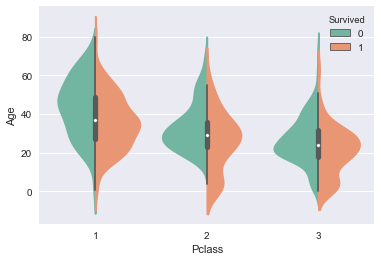

In [16]:
#Multivariate Analysis
#Correlating numerical and ordinal features:
#This can be done with numerical and categorical features which have numeric values.

# grid=sns.FacetGrid(train_df,col='Survived',row='Pclass',size=2.2,aspect=1.6)
# grid.map(plt.hist,'Age',alpha=.5,bins=20)
# grid.add_legend()

sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_df, split=True, size=6, palette="Set2");

#Observations:

# Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
# Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
# Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
# Pclass varies in terms of Age distribution of passengers.

#Decision:
#Consider Pclass for model training.

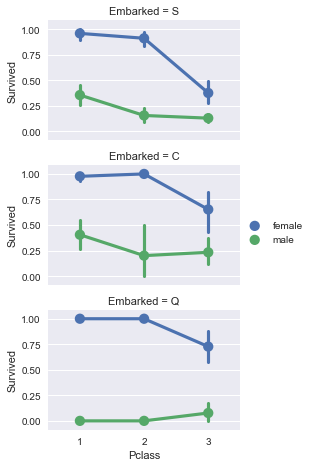

In [17]:
#Correlating categorical features with target variable

# Observations.

# Female passengers had much better survival rate than males. Confirms classifying (#1).
# Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
# Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
# Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).
# Decisions.

# Add Sex feature to model training.
# Complete and add Embarked feature to model training.
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep',hue_order=['female','male'])
grid.add_legend()




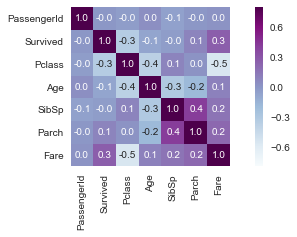

In [18]:
#Multivariate Analysis using Correlation matrix
#For interactions in numeric features, we can look at a correlation matrix.

#corr = train_df.drop(['PassengerId'], axis=1).corr()
corr = train_df.corr()
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig = plt.figure(figsize=(30, 10))
fig.add_subplot(3,3,9)
#sns.heatmap(corr, mask=mask, cmap=cmap, cbar_kws={"shrink": .5})
sns.heatmap(corr, vmax=.8, square=True, cmap="BuPu",annot=True,fmt=".1f");

#Observations:
# There is a positve coorelation between Fare and Survived and a negative coorelation between Pclass and Surived

# There is a negative coorelation between Fare and Pclass, Age and Plcass

In [19]:
# Wrangle data-Feature engineering:
# we'll see how to process and transform these variables in such a way the data becomes manageable by a machine learning algorithm.
#By dropping features we are dealing with fewer data points,
# Speeds up our notebook and eases the analysis.

# train_df=train_df.drop(['Ticket','Cabin'],axis=1)
# test_df=test_df.drop(['Ticket','Cabin'],axis=1)

# extracting and then removing the targets from the training data 
#targets = train_df.Survived
#train_df.drop(['Survived'], axis=1, inplace=True)

#merging train data and test data for future feature engineering
# we'll also remove the PassengerID since this is not an informative feature
#combined = train_df.append(test_df)
#combined_df.reset_index(inplace=True)
#combined.drop(['index', 'PassengerId'], inplace=True, axis=1)

In [20]:
#combined_df.head()
#combined_df.shape

In [21]:
#Feature Engineering:

combine_df = [train_df, test_df]


In [22]:
for dataset in combine_df:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
#Feature engineering:
#Extracting the passenger titles 
#Find the titles in training set:
#titles = set() #unique titles
#for name in train_df['Name']:
#titles.add(name.extract(' ([A-Za-z]+)\.', expand=False))     
#titles.add(name.split(',')[1].split('.')[0].strip())   
#print (titles)

#create data dictionary of titles
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty",
    "Dona" : "Royalty" #added later after checking for null in training set
}

In [24]:
# we extract the title from each name
for dataset in combine_df:
    dataset['Title'] = dataset['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

# a map of more aggregated title
# we map each title
for dataset in combine_df:
    dataset['Title'] = dataset['Title'].map(Title_Dictionary)


In [25]:
# combined_df.head()
# combined_df[combined_df['Title'].isnull()]

In [26]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.795276
4,Officer,0.277778
5,Royalty,0.600000


In [27]:
#Convert Title column to ordinal variable
title_ordinal_dict={"Master":1,"Miss":2,"Mr":3,"Mrs":4,"Officer":5,"Royalty":6}
for dataset in combine_df:
    dataset['Title']=dataset['Title'].map(title_ordinal_dict)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [28]:
#Now we can safely drop the Name feature from training and testing datasets.
train_df = train_df.drop(['Name', 'PassengerId','Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Name','Ticket', 'Cabin'], axis=1)
combine_df = [train_df, test_df]
#Drop cabin,embarked,Ticket from dataset


In [29]:
train_df.shape,test_df.shape
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,3
1,1,1,female,38.0,1,0,71.2833,C,4
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,4
4,0,3,male,35.0,0,0,8.0500,S,3


In [30]:
#Convert categorical to numerical values
for dataset in combine_df:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} )
 

In [31]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,3
1,1,1,1,38.0,1,0,71.2833,C,4
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,4
4,0,3,0,35.0,0,0,8.0500,S,3


In [32]:
#Handling missing values for Age
#let's group our dataset by sex, Title and passenger class and for each subset compute the median age.
grouped_train = train_df.groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [33]:
grouped_median_train

,Sex,Pclass,Title,Age
0,0,1,1,4.0
1,0,1,3,40.0
2,0,1,5,51.0
3,0,1,6,40.0
4,0,2,1,1.0
5,0,2,3,31.0
6,0,2,5,46.5
7,0,3,1,4.0
8,0,3,3,26.0
9,1,1,2,30.0


In [34]:
#Filling Age column with median values can be done in single line of code
for dataset in combine_df:
    dataset["Age"] = dataset.groupby(['Sex','Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 62.7+ KB


In [35]:
#Create Age Bands 
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
#Check the correlation with survivied
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.336735
2,"(32.252, 48.168]",0.412037
3,"(48.168, 64.084]",0.428571
4,"(64.084, 80]",0.090909


In [36]:
#Replace Age with ordinals
for dataset in combine_df:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
for dataset in combine_df:
    dataset['Age']=dataset['Age'].astype(int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
AgeBand     891 non-null category
dtypes: category(1), float64(1), int32(1), int64(6), object(1)
memory usage: 60.2+ KB


In [37]:
train_df=train_df.drop(['AgeBand'],axis=1)
combine_df=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,3
1,1,1,1,2,1,0,71.2833,C,4
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,4
4,0,3,0,2,0,0,8.0500,S,3


In [38]:
#Fill missing values of Embarked and fare

#Embarked having 2 missing values in train data
#Fare having 1 missing value in test data

   #print((train_df['Fare'] == 0).sum())
   #print(train_df[train_df['Fare'] == 0])
# mark zero values as missing or NaN
#train_df['Fare'] = train_df.Fare.replace(0, np.NaN)
# keep the index
#train_df[train_df.Fare.isnull()].index

#Fill Fare and Embarked missing values with median and mode respectively 
for dataset in combine_df:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())
    dataset['Embarked'] =  dataset['Embarked'].fillna(dataset['Embarked'].dropna().mode()[0])
  

In [39]:
#Transform categorical variables into dummy variables

embarked_dummies_train = pd.get_dummies(train_df['Embarked'],prefix='Embarked')
train_df=pd.concat([train_df,embarked_dummies_train], axis=1)

embarked_dummies_test = pd.get_dummies(test_df['Embarked'],prefix='Embarked')
test_df=pd.concat([test_df,embarked_dummies_test], axis=1)



In [40]:
#drop embarked columns
train_df=train_df.drop('Embarked', axis=1)
test_df=test_df.drop('Embarked', axis=1)

In [41]:
combine_df=[train_df,test_df]

In [42]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int32
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Title         891 non-null int64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(1), int32(1), int64(6), uint8(3)
memory usage: 54.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Title          418 non-null int64
Embarked_C     418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S  

In [43]:
#Feature Selection
#Tree-based estimators can be used to compute feature importances
train_predictors = train_df.drop("Survived", axis=1,inplace=False)
train_target = train_df["Survived"]
test_predictors  = test_df.drop("PassengerId", axis=1,inplace=False)
train_predictors.shape, train_target.shape, test_predictors.shape

((891, 10), (891,), (418, 10))

In [44]:
# clfm = RandomForestClassifier(n_estimators=50, max_features='sqrt')
# clfm = clfm.fit(train_predictors, train_target)
# features = pd.DataFrame()
# features['feature'] = train_predictors.columns
# features['importance'] = clf.feature_importances_
# features.sort_values(by=['importance'], ascending=True, inplace=True)
# features.set_index('feature', inplace=True)

In [45]:
#features.plot(kind='barh', figsize=(5, 5))

In [46]:
# we will use decisiontree and randomforest to train the model 
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_predictors,train_target)
test_output1=decision_tree.predict(test_predictors).astype(int)
#accuracy_score_dt = round(decision_tree.score(train_predictors, train_target) * 100, 2)
#accuracy_score_dt 
xval_dt = cross_val_score(decision_tree, train_predictors, train_target, cv = 5, scoring='accuracy')
np.mean(xval)

NameError: name 'xval' is not defined

In [ ]:
clf = RandomForestClassifier(n_estimators=30, max_features='sqrt',criterion='gini', max_depth=6)
clf = clf.fit(train_predictors, train_target)
test_output = clf.predict(test_predictors).astype(int)
xval_rf=cross_val_score(clf, train_predictors, train_target, cv = 5, scoring='accuracy')
np.mean(xval_rf)


In [ ]:
# from sklearn.metrics import confusion_matrix
# pd.DataFrame(
#     confusion_matrix(test_predictors, test_output),
#     columns=['Predicted Not Survival', 'Predicted Survival'],
#     index=['True Not Survival', 'True Survival']
# )

In [ ]:
df_output = pd.DataFrame()
aux = pd.read_csv('C:/Users/StephyJosin/Desktop/kaggle/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = test_output
df_output[['PassengerId','Survived']].to_csv('C:/Users/StephyJosin/Desktop/kaggle/TitanicResults.csv', index=False)